In [1]:
%pylab inline
from crossSection import CrossSection
from ShapeGen import genCirc
from numpy.random import rand,seed

Populating the interactive namespace from numpy and matplotlib


In [28]:
Q = 0.03
nx = 6
xs =linspace(0,500,nx)
zs = linspace(0,1,nx)
seed(5)
rs = 0.1 + rand(nx-1)#*ones(nx-1)
slopes = (zs[1:] - zs[:-1])/(xs[1:] - xs[:-1])
Ls = xs[1:]- xs[:-1]
f=0.1
#Generate cross-sections
xcs = []
maxdepths = []
for r in rs:
    x, y = genCirc(r)
    xc = CrossSection(x,y)
    xcs.append(xc)
    maxdepths.append(xc.ymax-xc.ymin)
    
#Calculate flow depths
h = zeros(nx)
for i, xc in enumerate(xcs):
    #Try calculating flow depth
    fd = xc.calcNormalFlowDepth(Q,slopes[i],f=f)
    backflooded= (h[i]-zs[i+1])>maxdepths[i]
    if fd==-1:
        over_normal_capacity=True
    else:
        over_normal_capacity=False
        
    if over_normal_capacity or backflooded:
        print('Pipe ',i,' is full')
        if i==0:
            #if downstream boundary set head to top of pipe
            h[0]=maxdepths[0]
        #We have a full pipe, calculate head gradient instead
        delh = xc.calcPipeFullHeadGrad(Q,slopes[i],f=f)
        h[i+1] = h[i] + delh * (xs[i+1] - xs[i])
    else:
        crit_fd = xc.calcCritFlowDepth(Q)
        y_star = min([crit_fd,fd])
        y_out = h[i] - zs[i]
        downstream_critical = y_star>y_out and y_star>0# and i>0
        partial_backflood = fd < h[i] - zs[i+1]
        downstream_less_normal = fd>y_out
        if partial_backflood: #upstream node is flooded above normal depth
            print('Pipe ',i,' is partially backflooded.')
            y_in = xc.calcUpstreamHead(Q,slopes[i],y_out,Ls[i],f=f)
            h[i+1] = zs[i+1] + y_in
        elif downstream_critical:
            print('Pipe ',i,' is downstream critical.')
            #Use minimum of critical or normal depth for downstream y
            print(y_star)
            y_in = xc.calcUpstreamHead(Q,slopes[i],y_star,Ls[i],f=f)
            h[i+1] = zs[i+1] + y_in
            if i==0:
                h[0]=y_star
        elif downstream_less_normal:
            print('Pipe ',i,'is downstream less than normal depth.')
            y_in = xc.calcUpstreamHead(Q,slopes[i],y_out,Ls[i],f=f)
            h[i+1] = zs[i+1] + y_in
        else:
            print('Pipe ',i,' is normal')
            print('fd',fd, '  ystar=',y_star)
            if i==0:
                h[i] = fd + zs[i]
            #dz = slopes[i]*(x[i+1] - x[i])
            h[i+1] = zs[i+1] + fd


Pipe  0  is downstream critical.
0.008331855110422127
Pipe  1  is normal
fd 0.0006337006744293155   ystar= -1
Pipe  2  is downstream critical.
0.010018823229727502
Pipe  3  is normal
fd 0.0005538377244668066   ystar= -1
Pipe  4 is downstream less than normal depth.


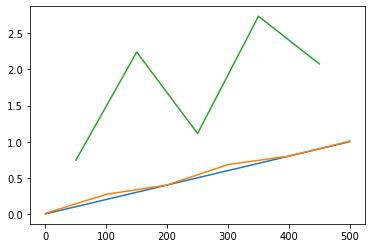

In [29]:
plot(xs,zs,xs,h)
xmid = (xs[1:] + xs[:-1])/2.
plot(xmid,maxdepths+(zs[1:] + zs[:-1])/2.)

In [17]:
maxdepths

[0.643985547690147,
 1.9414622171596658,
 0.6134375538767878,
 2.0372193025445915,
 1.1768209257377116]

0.0970731108579833 0.8384384339356487 0.4237570732172906
0.11472276737761662 0.9093051140906359 0.46228044350977215
0.13237242389724996 0.9733744927367315 0.4978404776259081
0.15002208041688328 1.0308894083486235 0.5304371755656997
0.1676717369365166 1.0871708370288942 0.563033873505491
0.18532139345614992 1.1372087367581842 0.5926672352689386
0.20297104997578325 1.1812827717194203 0.6193372608560405
0.2206207064954166 1.2291426628175381 0.6489706226194872
0.2382703630150499 1.2711786626535972 0.6756406482065895
0.25592001953468324 1.3076902572385536 0.6993473376173469
0.27356967605431654 1.347775424629692 0.726017363204449
0.2912193325739499 1.3825013564953839 0.7497240526152067
0.30886898909358323 1.4163523201533859 0.7734307420259645
0.32651864561321653 1.4493068917426206 0.7971374314367218
0.3441683021328499 1.4773903881221646 0.8178807846711349
0.3618179586524832 1.5086084652560472 0.8415874740818922
0.3794676151721165 1.5351417482229102 0.8623308273163051
0.3971172716917499 1.560

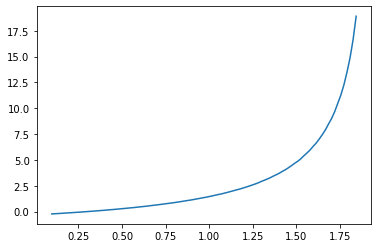

In [18]:
#xcs[1].calcCritFlowDepth(0.3)

maxdepth = xcs[1].ymax - xcs[1].ymin
depths = linspace(0.05*maxdepth,0.95*maxdepth,100)
res = zeros(100)

for i,depth in enumerate(depths):
    res[i] = xcs[1].crit_flow_depth_residual(depth,1.75)
plot(depths, res)

In [19]:
res

array([-2.21743090e-01, -2.03855704e-01, -1.85737542e-01, -1.67726263e-01,
       -1.48325472e-01, -1.29440375e-01, -1.11392736e-01, -9.01317285e-02,
       -6.98721134e-02, -5.09384577e-02, -2.85620198e-02, -7.68329359e-03,
        1.41577696e-02,  3.69936194e-02,  5.78179348e-02,  8.26129358e-02,
        1.05208443e-01,  1.28671880e-01,  1.56586110e-01,  1.82005792e-01,
        2.04557761e-01,  2.31788153e-01,  2.60041546e-01,  2.89353741e-01,
        3.15349596e-01,  3.46729140e-01,  3.74556421e-01,  4.03271208e-01,
        4.37931312e-01,  4.68667700e-01,  5.00385464e-01,  5.33116999e-01,
        5.72630292e-01,  6.07676419e-01,  6.43848739e-01,  6.81186141e-01,
        7.19729282e-01,  7.59520690e-01,  8.00604856e-01,  8.35862734e-01,
        8.79439479e-01,  9.24446692e-01,  9.70937460e-01,  1.01896742e+00,
        1.06859492e+00,  1.11121555e+00,  1.16393297e+00,  1.21842930e+00,
        1.27477478e+00,  1.33304320e+00,  1.38311484e+00,  1.44511272e+00,
        1.50926397e+00,  

In [11]:
ds = linspace(1e-6,xcs[0].ymax-xcs[0].ymin,100)
Q = zeros(100)
for i,y in enumerate(ds):
    Q[i] = xcs[0].calcNormalFlow(y,0.002)

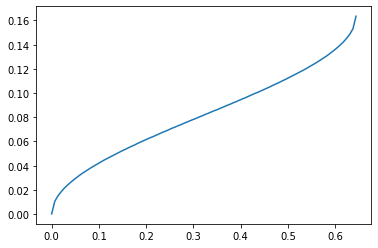

In [12]:
plot(ds,Q)

In [13]:
xcs[0].ymax-xcs[0].ymin

0.643985547690147

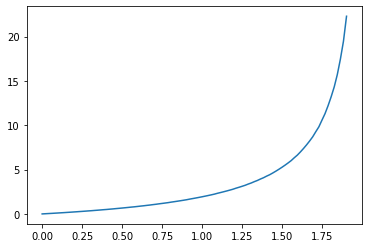

In [15]:
x, y = genCirc(1.,d=1000)
xc = CrossSection(x,y)
maxdepth = xc.ymax - xc.ymin
depths = linspace(0.0005*maxdepth,0.95*maxdepth,100)
res = zeros(100)

for i,depth in enumerate(depths):
    res[i] = xc.crit_flow_depth_residual(depth,0.25)
plot(depths, res)    

In [16]:
res

array([-5.33356826e-03,  1.43322428e-02,  3.46574067e-02,  5.40686441e-02,
        7.48261934e-02,  9.59005619e-02,  1.17992850e-01,  1.38860476e-01,
        1.61577229e-01,  1.84084458e-01,  2.08262029e-01,  2.31744321e-01,
        2.56710739e-01,  2.80495001e-01,  3.05569122e-01,  3.31978985e-01,
        3.56615173e-01,  3.85683832e-01,  4.12767951e-01,  4.41066637e-01,
        4.70623075e-01,  4.97552515e-01,  5.29592209e-01,  5.58770245e-01,
        5.93471042e-01,  6.25061541e-01,  6.57838842e-01,  6.91844481e-01,
        7.27121981e-01,  7.63717133e-01,  7.96169476e-01,  8.35340935e-01,
        8.75973870e-01,  9.12007169e-01,  9.55503216e-01,  9.94078355e-01,
        1.04064731e+00,  1.08195273e+00,  1.13182508e+00,  1.17606807e+00,
        1.22174251e+00,  1.26889924e+00,  1.32586001e+00,  1.37641423e+00,
        1.42862795e+00,  1.48256278e+00,  1.53828326e+00,  1.59585707e+00,
        1.66546380e+00,  1.72730140e+00,  1.79122946e+00,  1.85733081e+00,
        1.92569252e+00,  